@Author: Rahul<br>
@Date: 18-11-2024<br>
@Last modified by: Rahul<br>
@Last modified Date:18-11-2024<br>
@Title: predicting whether customer will subscribe to term deposit or not using single layer neural network

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Reading the Data

In [37]:
dataset = pd.read_csv('bank.csv',delimiter=';')

print(dataset.info())
print(dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None
age          0
job          0
marital      0
education    0
default      0
balance      0
hous

Handling the Outlier

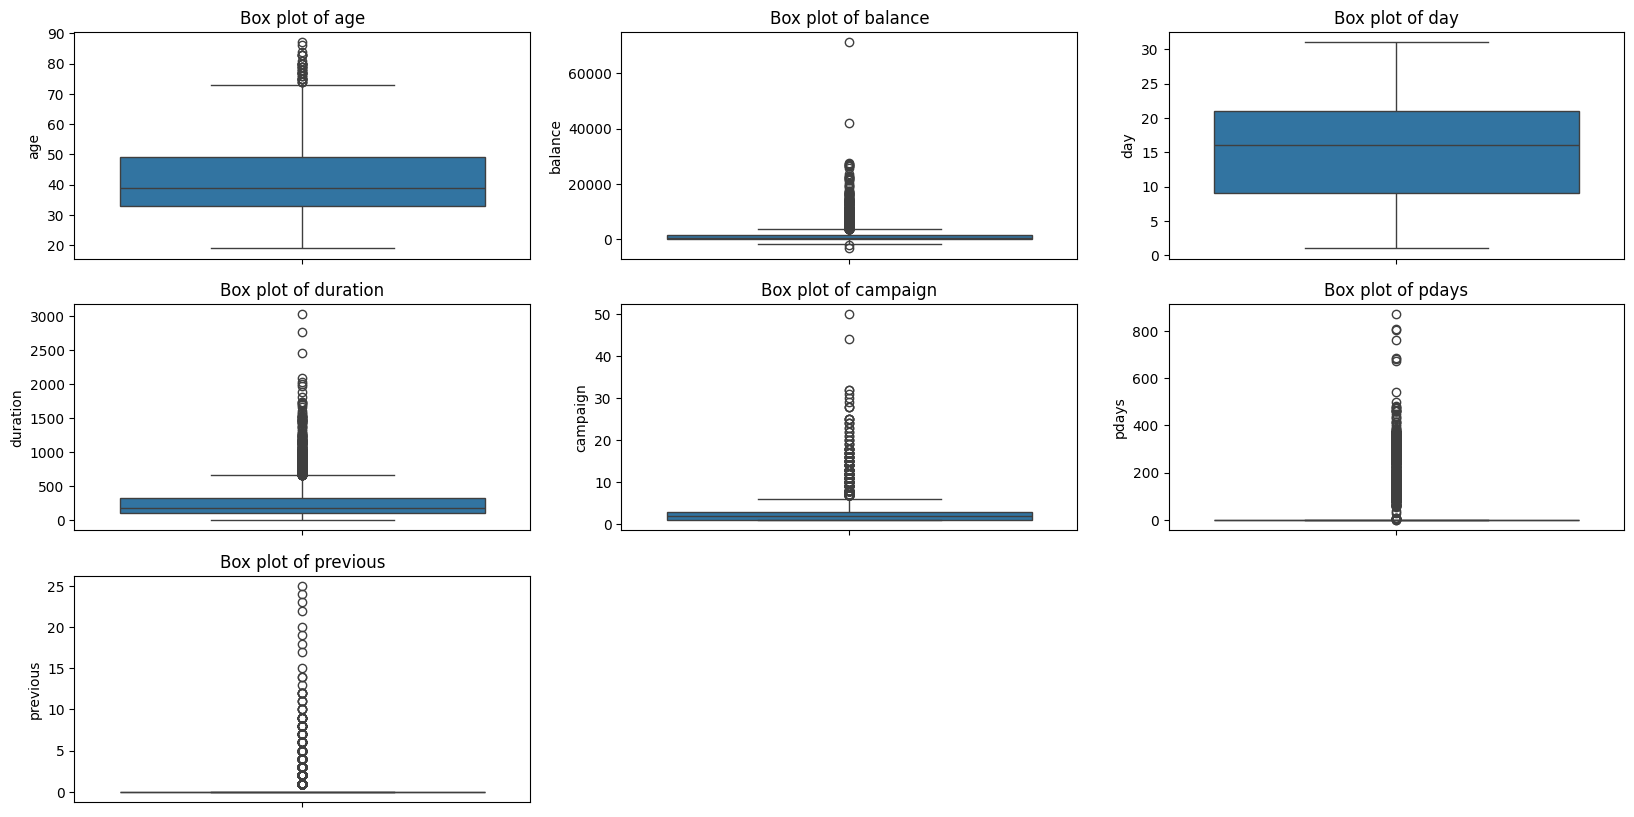

In [38]:
numerical_columns = dataset.select_dtypes(include=np.number)

plt.figure(figsize=(20,10))

for i,column in enumerate(numerical_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(numerical_columns[column])
    plt.title(f'Box plot of {column}')

plt.show()

(2799, 17)
               age      balance          day     duration     campaign  \
count  2799.000000  2799.000000  2799.000000  2799.000000  2799.000000   
mean     40.497678   633.188639    15.801000   209.708467     2.198642   
std       9.868212   876.283335     8.336777   146.281984     1.351878   
min      19.000000 -1746.000000     1.000000     4.000000     1.000000   
25%      33.000000    35.500000     8.000000   101.000000     1.000000   
50%      39.000000   317.000000    16.000000   171.000000     2.000000   
75%      48.000000   959.500000    22.000000   280.500000     3.000000   
max      73.000000  3561.000000    31.000000   665.000000     6.000000   

        pdays  previous  
count  2799.0    2799.0  
mean     -1.0       0.0  
std       0.0       0.0  
min      -1.0       0.0  
25%      -1.0       0.0  
50%      -1.0       0.0  
75%      -1.0       0.0  
max      -1.0       0.0  


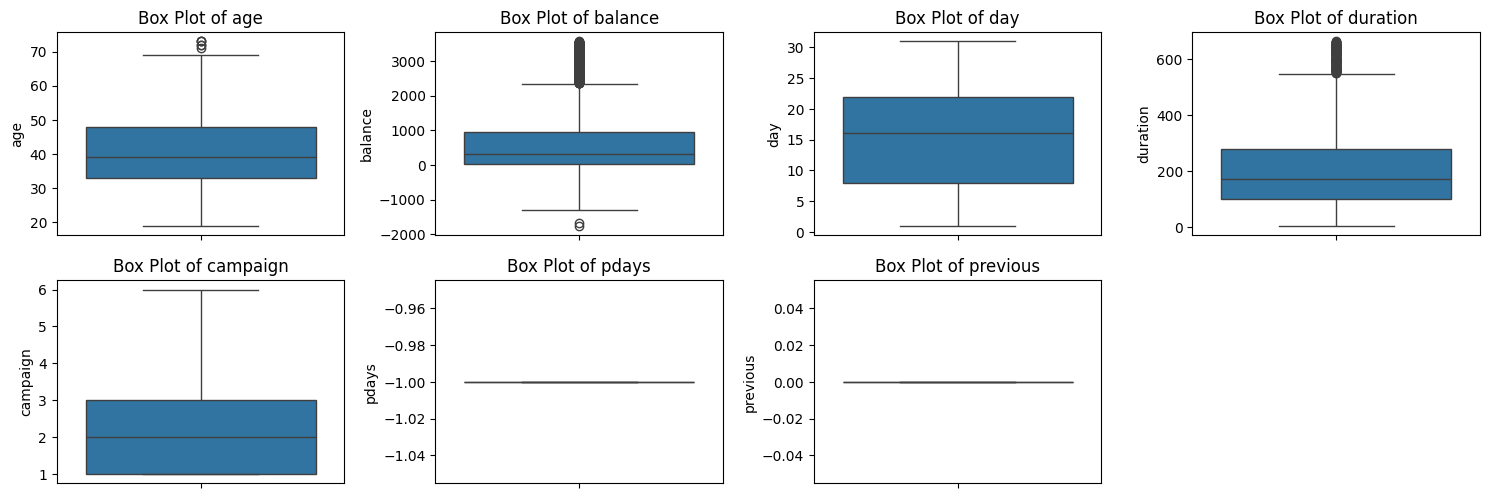

In [39]:
# Capping the outliers in each numerical column
for column in numerical_columns:
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Cap the outliers directly in the dataset copy
    dataset= dataset[(dataset[column]>=lower_bound) & (dataset[column]<=upper_bound)]
print(dataset.shape)

# Checking the summary after handling outliers
print(dataset.describe())

# Plotting box plots for each column to check if outliers are capped
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=dataset[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

Label Encoding

In [40]:
encode = LabelEncoder()

categorical_data = dataset.select_dtypes(include=('object')).columns

for column in categorical_data:
    dataset[column] = encode.fit_transform(dataset[column])

Spliting the data

In [41]:
feature = dataset.drop(columns = ['y'])
target = dataset['y']

x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=42)

In [42]:
scalling = StandardScaler()

x_train = scalling.fit_transform(x_train)
x_test = scalling.transform(x_test)

Model Selecting

In [43]:
model = Sequential()

# Input layer (input shape should match the number of features)
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))

# Hidden layer(s)
model.add(Dense(32, activation='relu'))

# Output layer (single neuron for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model architecture
model.summary()

c:\Users\rahul\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [44]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8030 - loss: 0.4725 - val_accuracy: 0.9464 - val_loss: 0.2060
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9434 - loss: 0.2056 - val_accuracy: 0.9464 - val_loss: 0.1872
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9475 - loss: 0.1697 - val_accuracy: 0.9464 - val_loss: 0.1842
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.1853 - val_accuracy: 0.9464 - val_loss: 0.1842
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9410 - loss: 0.1689 - val_accuracy: 0.9446 - val_loss: 0.1868
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9325 - loss: 0.1812 - val_accuracy: 0.9446 - val_loss: 0.1892
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9405 - loss: 0.1694 - val_accuracy: 0.9429 - val_loss: 0.1911
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9390 - loss: 0.1630 - val_accuracy: 0.9446 - val_loss:

Evaluate the model

In [48]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


# Make predictions on the test set
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', class_report)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9238 - loss: 0.2243
Test accuracy: 93.75%
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.9375
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       530
           1       0.31      0.13      0.19        30

    accuracy                           0.94       560
   macro avg       0.63      0.56      0.58       560
weighted avg       0.92      0.94      0.93       560



Make Predictions

In [46]:
predictions = model.predict(x_test)

# Convert probabilities to binary output (0 or 1)
predictions = (predictions > 0.5).astype(int)

# Print the first 10 predictions
print(predictions[:10])

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
